# SMA Percent Band

Demonstrate integration of pinkfish with the quantopian pyfolio library  
https://github.com/quantopian/pyfolio

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
Note: The function create_returns_tear_sheet() in the last cell takes several minutes to complete.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pyfolio

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DJA'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
#start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Include dividends? (If yes, set to True)

In [4]:
use_adj = True

Define high low trade periods

In [5]:
sma_period = 200
percent_band = 3.5

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, use_adj, sma_period, percent_band)
s.run()

Retrieve log DataFrames

In [7]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
19,1998-11-04,1118.67,1999-10-15,1247.41,128.74,20340.92,158,187440.41,LONG,^GSPC
20,1999-10-29,1362.93,2000-10-10,1387.02,24.09,3468.96,144,190909.37,LONG,^GSPC
21,2003-04-22,911.37,2004-08-06,1063.97,152.60,33571.99,220,224481.36,LONG,^GSPC
22,2004-11-04,1161.67,2007-11-21,1416.77,255.10,51275.10,201,275756.46,LONG,^GSPC
23,2009-06-12,946.21,2010-06-04,1064.88,118.67,35838.33,302,311594.79,LONG,^GSPC
24,2010-10-05,1160.75,2011-08-04,1200.07,39.32,10891.63,277,322486.42,LONG,^GSPC
25,2012-01-18,1308.04,2015-08-21,1970.89,662.85,168363.89,254,490850.31,LONG,^GSPC
26,2016-04-18,2094.34,2018-10-24,2656.10,561.76,134260.64,239,625110.95,LONG,^GSPC
27,2019-03-21,2854.88,2020-03-09,2746.56,-108.32,-24047.00,222,601063.95,LONG,^GSPC
28,2020-06-03,3122.87,2020-08-21,3397.16,274.29,53486.51,195,654550.46,LONG,^GSPC


In [9]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-08-17,662684.35,661052.17,661592.33,195,2104.28,1.00,-
2020-08-18,664140.99,659283.51,663111.39,195,2104.28,1.00,-
2020-08-19,665014.59,659187.96,660200.05,195,2104.28,1.00,-
2020-08-20,663310.29,656268.82,662278.73,195,2104.28,1.00,-
2020-08-21,664550.46,664550.46,664550.46,0,664550.46,1.00,X


Run Benchmark, Retrieve benchmark logs

In [10]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end, s.use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()

1957-03-04 00:00:00 BUY  226 ^GSPC @ 44.06
2020-08-21 00:00:00 SELL 226 ^GSPC @ 3397.16


Pyfolio Returns Tear Sheet

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.98,2020-02-19,2020-06-11,NaT,NaN
1,21.31,1987-08-25,1988-08-22,1989-06-07,467
2,19.41,1998-07-17,1998-11-12,1999-07-02,251
3,17.30,1978-09-12,1979-05-14,1980-09-19,529
4,15.87,2007-10-09,2009-07-10,2009-09-14,505


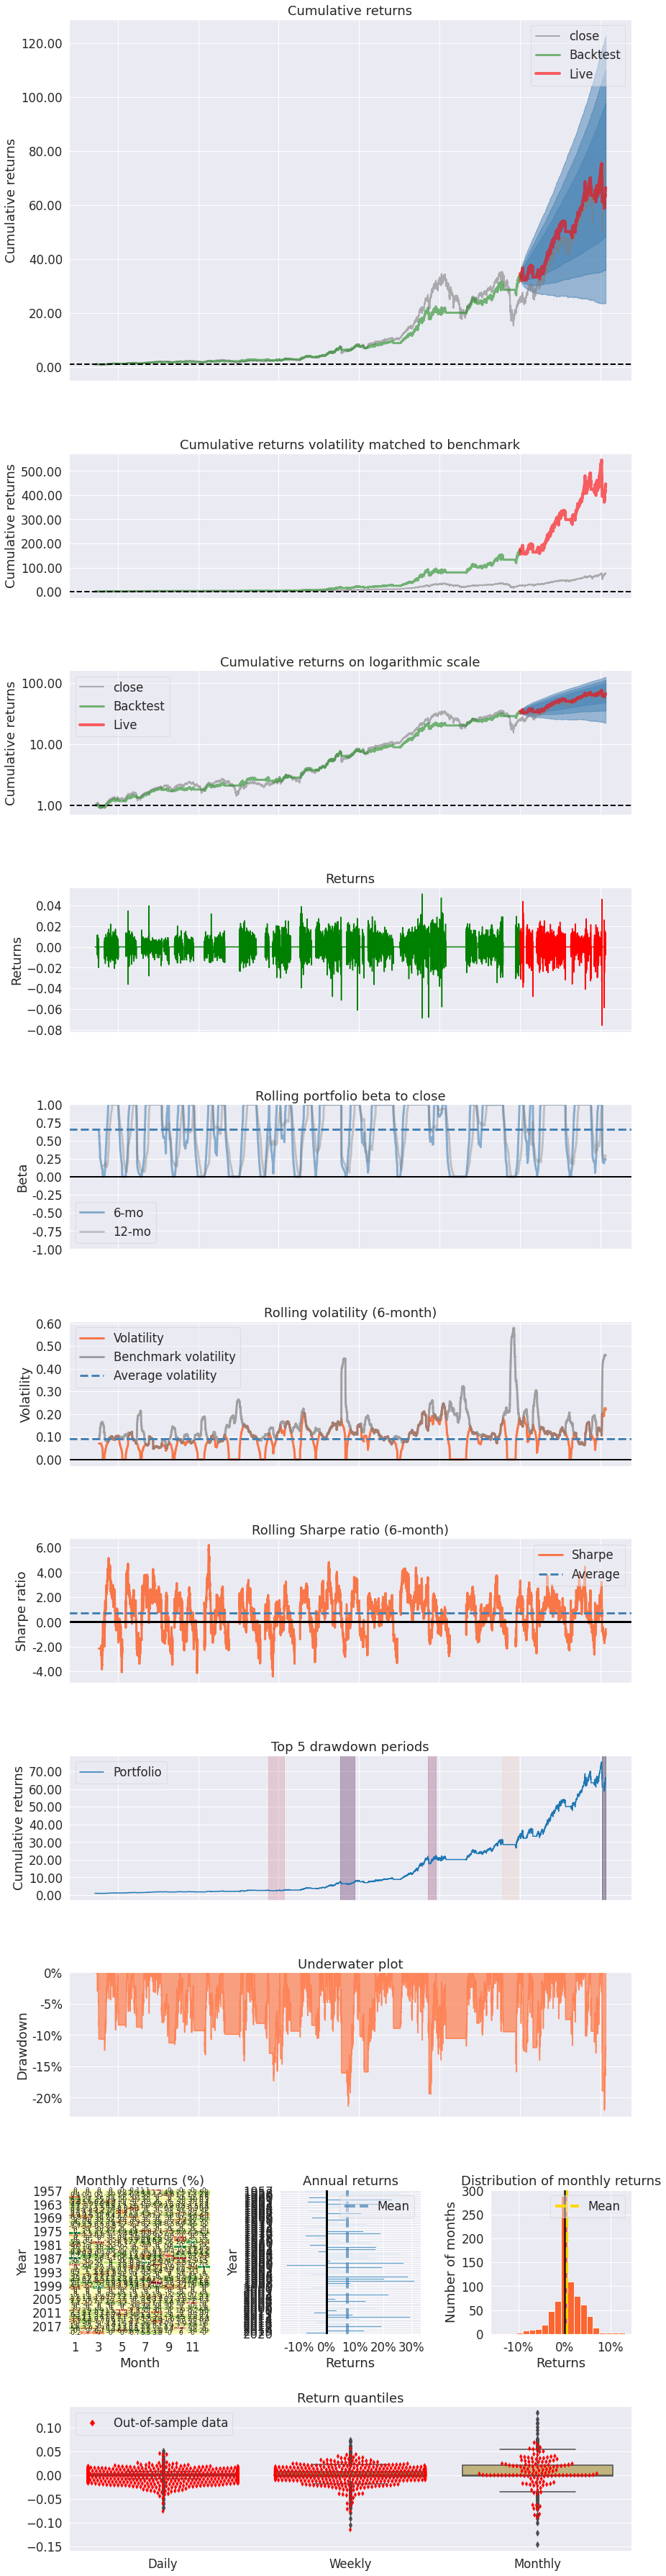

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

returns = dbal['close'].pct_change()
benchmark_rets = benchmark.dbal['close'].pct_change()

returns.index = returns.index.tz_localize('UTC')
benchmark_rets.index = benchmark_rets.index.tz_localize('UTC')

live_start_date=None
live_start_date='2010-01-01'

pyfolio.create_returns_tear_sheet(returns, benchmark_rets=benchmark_rets, live_start_date=live_start_date)
#pyfolio.create_simple_tear_sheet(returns, benchmark_rets=benchmark_rets)
#pyfolio.create_interesting_times_tear_sheet(returns, benchmark_rets=benchmark_rets)